<a href="https://colab.research.google.com/github/chaitanyaa1512/Machine-Learning/blob/main/ML__Lab_03_Part_B_T3_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression



## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('/content/50_Startups.csv')

##Data analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Preparing Data as input and output

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array (ct.fit_transform(X))

In [10]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 0)

In [16]:
print(X_train)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

## Training the Multiple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [13]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[181566.92389386]


##Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)


[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.52924853204


## variance score: 1 means perfect prediction 

In [ ]:
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

Variance score: 0.9347068473282515


In above example, we determine accuracy score using Explained Variance Score.

We define:
**explained_variance_score = 1 – Var{y – y’}/Var{y}**

where  
* y’ is the estimated target output,
* y the corresponding (correct) target output
* Var is Variance, the square of the standard deviation.

***The best possible score is 1.0, lower values are worse.**

# plot for residual error 
  
## setting plot style 

In [ ]:
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data

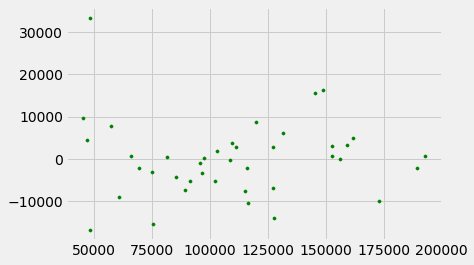

In [ ]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 

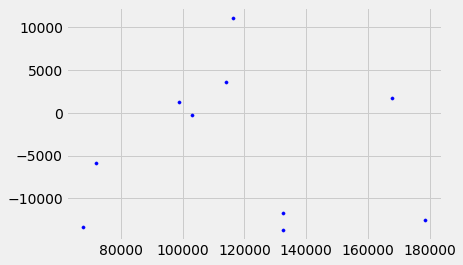

In [ ]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 

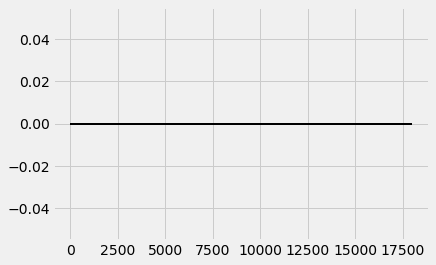

In [ ]:
plt.hlines(y = 0, xmin = 0, xmax = 18000, linewidth = 2) 

## plotting legend 

No handles with labels found to put in legend.


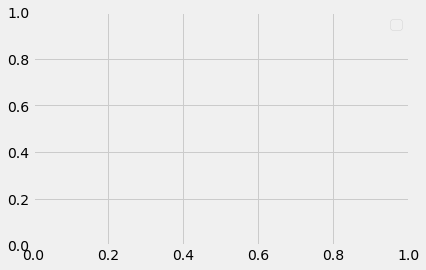

In [ ]:
plt.legend(loc = 'upper right') 

## plot title 

Text(0.5, 1.0, 'Residual errors')

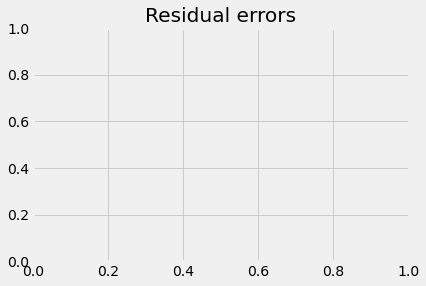

In [ ]:
plt.title("Residual errors") 

## function to show plot 

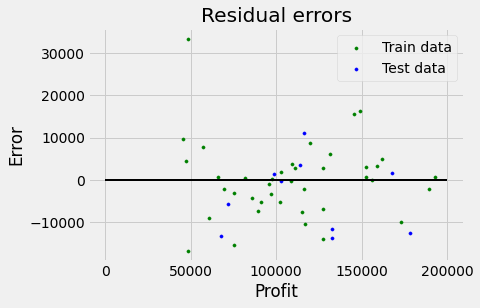

In [ ]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show() 

# Find the R^2 

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9347068473282515


##Test your knowledge:

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 7)

In [18]:
print(X_train)

[[1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 1.0 0.0 1315.46 115816.21 297114.46]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [23]:
print(regressor.predict([[0,1,0,300000,160000,200000]]))

[291695.46960971]


In [24]:
print(regressor.coef_)
print(regressor.intercept_)

[-4.31767824e+02 -1.55681873e+03  1.98858655e+03  8.08286664e-01
 -2.61729246e-02  3.07501226e-02]
48803.93258842715


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8998123419674292
